In [1]:
#!usr/bin/python3 

import pandas as pd
import json
import matplotlib.pyplot as plt
from iso639 import languages

In [2]:
tweets_data_path = '04_04_2018-tweet_extract.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print ("Total Data Samples Present -", len(tweets_data))

Total Data Samples Present - 60000


In [3]:
print("Keys availble on the data - ", tweets_data[0].keys())

Keys availble on the data -  dict_keys(['entities', 'timestamp_ms', 'user', 'possibly_sensitive', 'in_reply_to_status_id_str', 'truncated', 'place', 'in_reply_to_screen_name', 'retweet_count', 'is_quote_status', 'in_reply_to_user_id_str', 'geo', 'retweeted_status', 'id', 'filter_level', 'quote_count', 'favorite_count', 'retweeted', 'text', 'coordinates', 'created_at', 'source', 'in_reply_to_status_id', 'favorited', 'reply_count', 'contributors', 'in_reply_to_user_id', 'id_str', 'lang'])


In [4]:
'''# Build DataFrame of tweet texts and languages
tweets = pd.DataFrame(tweets_data, columns=["text","lang","country", "user"])

# Print head of DataFrame
print(tweets.head())'''


'# Build DataFrame of tweet texts and languages\ntweets = pd.DataFrame(tweets_data, columns=["text","lang","country", "user"])\n\n# Print head of DataFrame\nprint(tweets.head())'

In [5]:
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets["user"] = list(map(lambda tweet: str(tweet['user']), tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
print(tweets.head())
tweets_by_lang = tweets['lang'].value_counts()

print (tweets_by_lang.head())

                                                text lang  \
0  RT @IndiaToday: Congress  Spokesperson Prof Go...   en   
1  RT @CNNnews18: "If there was no BJP and Modi, ...   en   
2  RT @INCIndia: Instead of ensuring that the ben...   en   
3  RT @inquestioner: Dei paavingala, konjom namba...   in   
4  @narendramodi @PMOIndia @AmitShahOffice https:...  und   

                                                user country  
0  {'default_profile_image': False, 'friends_coun...    None  
1  {'default_profile_image': False, 'friends_coun...    None  
2  {'default_profile_image': False, 'friends_coun...    None  
3  {'default_profile_image': False, 'friends_coun...    None  
4  {'default_profile_image': False, 'friends_coun...    None  
en     43180
hi      8144
tl      2265
pt      1406
und     1064
Name: lang, dtype: int64


In [6]:
cont = tweets.country.tolist()
from collections import Counter
print(Counter([i for i in cont if i != None]))

Counter({'India': 595, 'Republic of the Philippines': 53, 'Brasil': 37, 'भारत': 18, 'United Arab Emirates': 12, 'United States': 11, 'Italia': 9, 'United Kingdom': 7, 'Pakistan': 7, 'Chile': 6, 'Canada': 6, 'Brazil': 5, 'Malaysia': 4, "People's Republic of China": 3, 'Singapore': 3, 'España': 3, '': 2, 'France': 2, 'Russia': 2, 'Australia': 2, 'Irlanda': 1, 'Indonesia': 1, 'Kingdom of Saudi Arabia': 1, 'Rwanda': 1, 'Nepal': 1, '日本': 1, 'Paraguay': 1, 'México': 1, 'Bahrain': 1, 'Qatar': 1, 'Oman': 1, 'Japan': 1, 'Hong Kong': 1, 'Thailand': 1, 'Italy': 1, 'Cyprus': 1, 'Republic of Slovenia': 1, 'Kenya': 1, 'Suíça': 1, 'Spain': 1, 'Argentina': 1, 'Austria': 1, 'Türkiye': 1})


India                          595
Republic of the Philippines     53
Brasil                          37
भारत                            18
United Arab Emirates            12
Name: country, dtype: int64


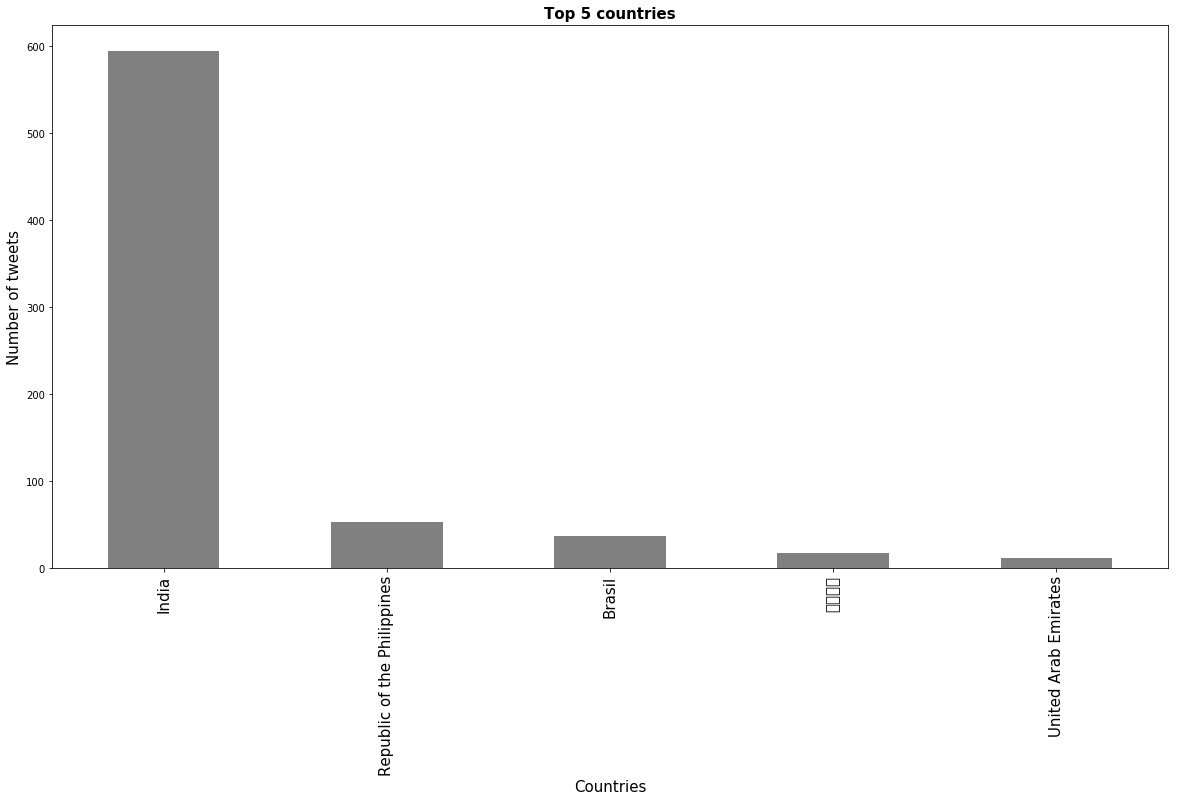

In [7]:
tweets_by_country = tweets['country'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='grey', figsize=(20,10))
print(tweets_by_country[:5])
plt.show()

English       43180
Hindi          8144
Tagalog        2265
Portuguese     1406
und            1064
Name: lang_name, dtype: int64


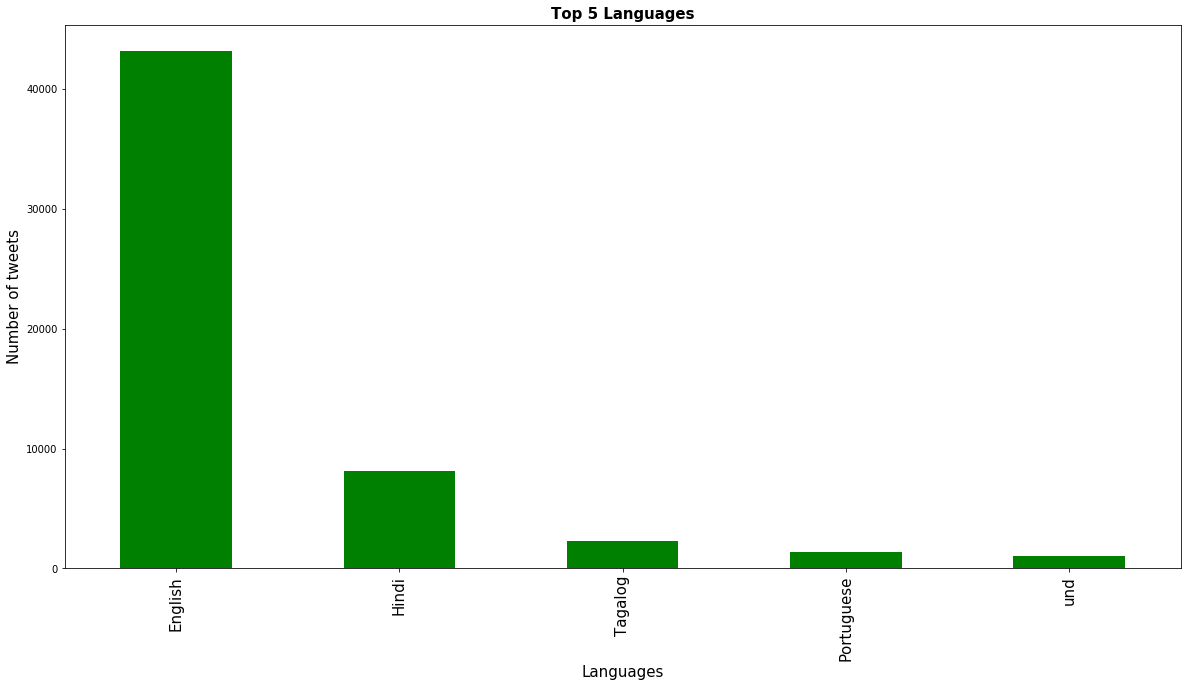

In [8]:
def lang_code_to_name(code):
    try:
        argm = languages.get(alpha2=code)
        return argm.name
    except:
        return code
    
tweets_by_language = pd.DataFrame()
tweets_by_language["lang_name"] = tweets.lang.apply(lang_code_to_name)
t_b_l_5 = tweets_by_language["lang_name"].value_counts()[:5]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 Languages', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='green', figsize=(20,10))
print(t_b_l_5[:5])
plt.show()

2017    10669
2016     6289
2010     6020
2018     5840
2015     5751
Name: year, dtype: int64


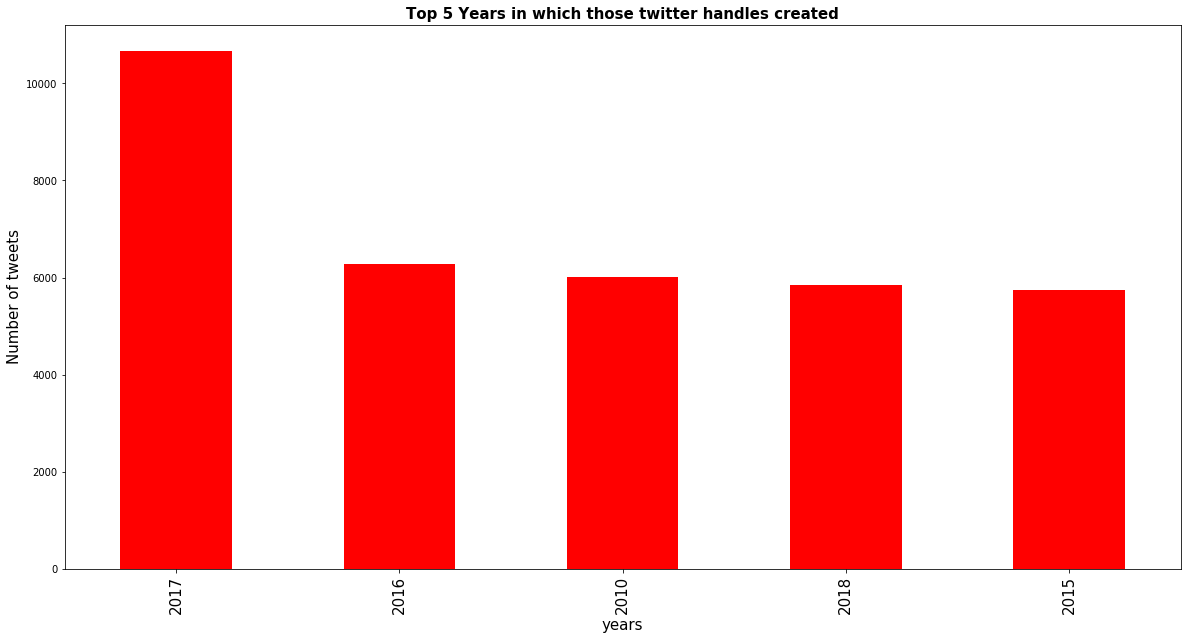

In [9]:
def handle_created_year(string):
    try:
        res = eval(string)["created_at"]
        return str(res.split()[-1])
    except:
        return "Year Unavailable"
    
handles_by_year = pd.DataFrame()
tweets_by_language["year"] = tweets.user.apply(handle_created_year)
t_b_l_5 = tweets_by_language["year"].value_counts()[:5]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('years', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 Years in which those twitter handles created', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='red', figsize=(20,10))
print(t_b_l_5[:5])
plt.show()

INDIA                   18333
Location Unavailable    17456
DELHI                    1546
भारत                     1328
MUMBAI                   1036
BANGALORE                 556
CHENNAI                   420
HYDERABAD                 367
USA                       357
BRASIL                    348
Name: location, dtype: int64


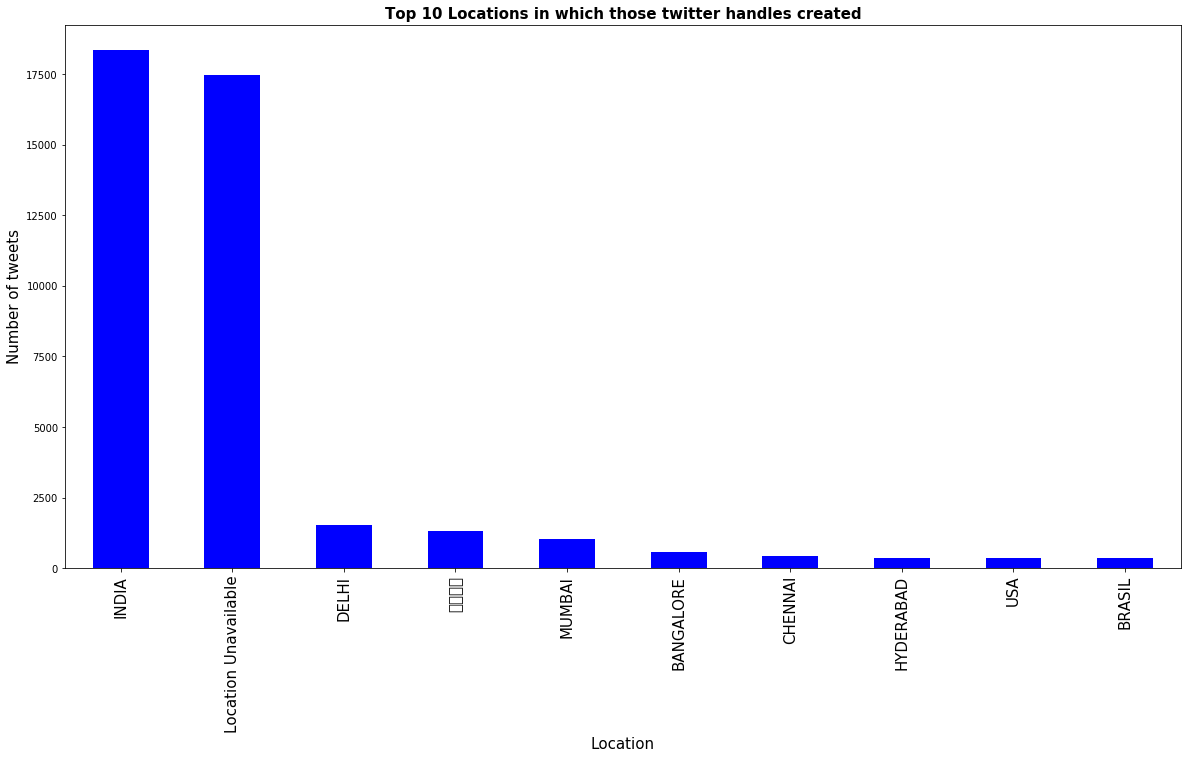

In [10]:
def handle_location_used(string):
    try:
        res = eval(string)["location"]
        return str(res.split()[-1]).upper()
    except:
        return "Location Unavailable"
    
handles_by_location = pd.DataFrame()
handles_by_location["location"] = tweets.user.apply(handle_location_used)
t_b_l_5 = handles_by_location["location"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Location', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Locations in which those twitter handles created', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='blue', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

No Profile Image Available                                                    5029
http://pbs.twimg.com/profile_images/951885952284164096/ZCyEqqOP_normal.jpg     105
http://pbs.twimg.com/profile_images/974387805324480512/5hIokSMp_normal.jpg      99
http://pbs.twimg.com/profile_images/730162168973271040/PAQMz916_normal.jpg      79
http://pbs.twimg.com/profile_images/970354408914587652/Zn0K7jmw_normal.jpg      59
http://pbs.twimg.com/profile_images/672370402560053248/EcGUmaBW_normal.jpg      57
http://pbs.twimg.com/profile_images/980100527848554498/Mx_OiwHe_normal.jpg      55
http://pbs.twimg.com/profile_images/581821098003681280/ym_OIlTB_normal.jpg      55
http://pbs.twimg.com/profile_images/962665550806646784/5tJaczac_normal.jpg      47
http://pbs.twimg.com/profile_images/963844191745859584/e1hOJ_X4_normal.jpg      44
Name: image_availability, dtype: int64


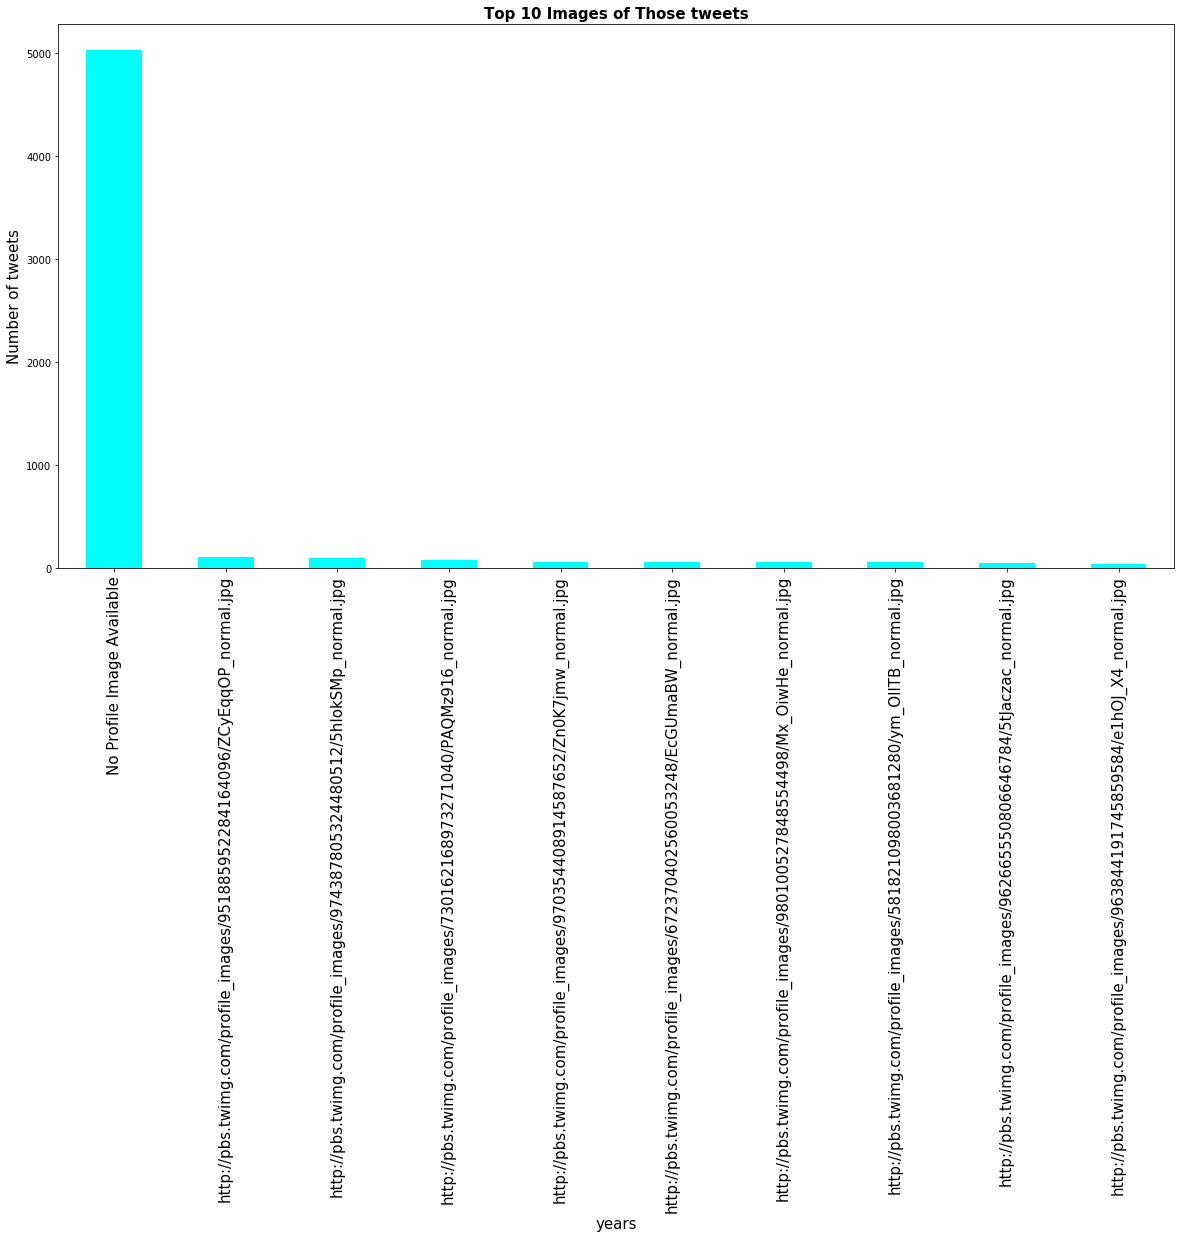

In [11]:
def handle_has_image(string):
    try:
        res = eval(string)["profile_image_url"]
        if "default_profile_normal.png" not in res:
            return res
        else:
            return "No Profile Image Available"
    except:
        return "No Profile Image Available"
    
handles_image_availability = pd.DataFrame()
handles_image_availability["image_availability"] = tweets.user.apply(handle_has_image)
t_b_l_5 = handles_image_availability["image_availability"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('years', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Images of Those tweets', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='cyan', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

@PMNamo_            105
@Georgekurian4K      99
@Honestpoltics       86
@krishnachaube12     79
@mdkhan4114          59
@PDrsudhakar         57
@9Yf3IVJfVa47sKG     56
@puriyash41          55
@babun1515           55
@jainanil1968        47
Name: screen_name, dtype: int64


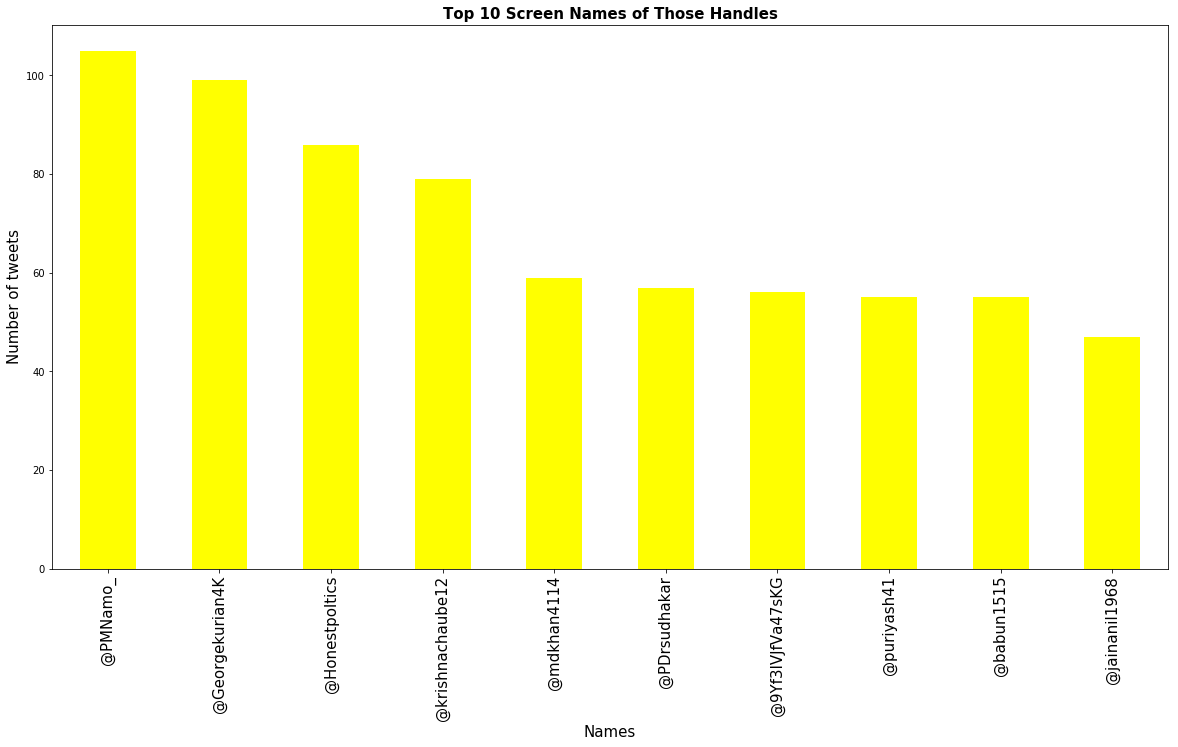

In [12]:
def handle_name(string):
    try:
        res = eval(string)["screen_name"]
        return "@"+res
    except:
        return None
    
handles_names = pd.DataFrame()
handles_names["screen_name"] = tweets.user.apply(handle_name)
t_b_l_5 = handles_names["screen_name"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Names', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Screen Names of Those Handles', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='yellow', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

Narendra Modi           116
George Kurian            99
RAJ                      88
Krishna Chaubey          79
M.Danish Khan            59
Yash                     57
Dr Sudhakar Phulekar     57
हर्ष शर्मा कांग्रेस      56
Babun Munshi             55
Anil Jain                47
Name: image_availability, dtype: int64


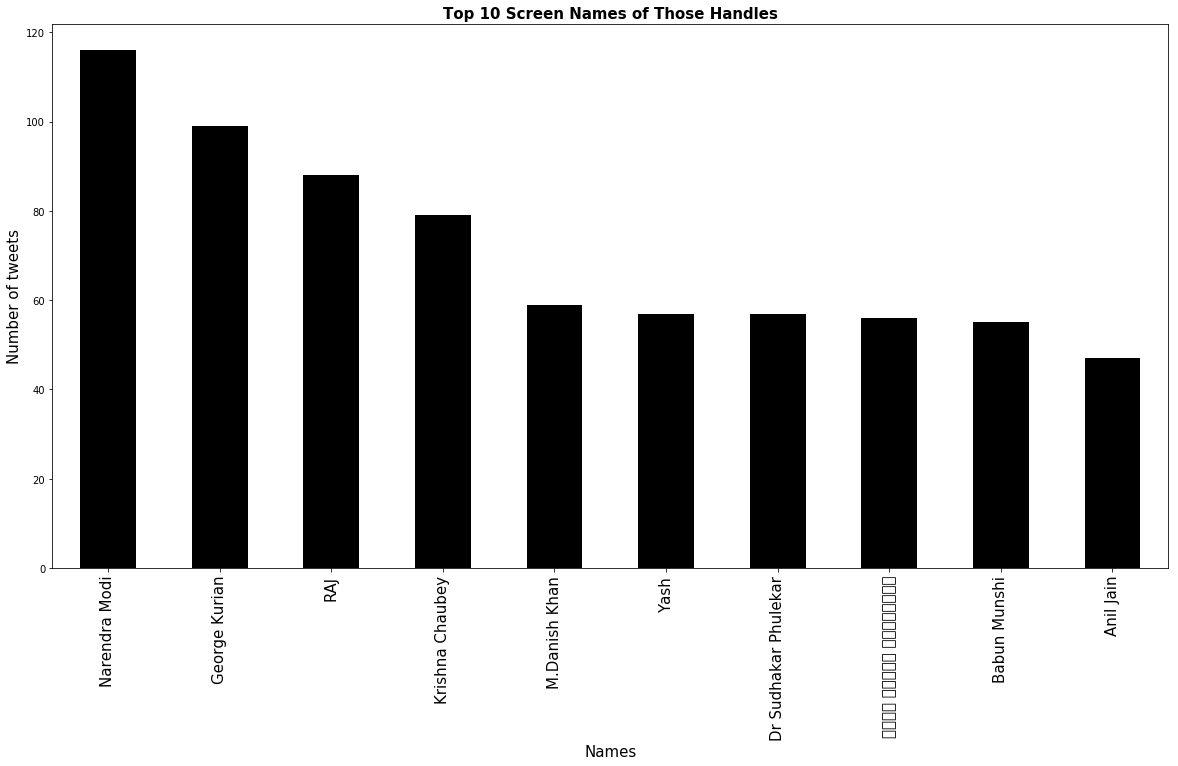

In [14]:
def handle_full_name(string):
    try:
        res = eval(string)["name"]
        return res
    except:
        return None
    
handles_image_availability = pd.DataFrame()
tweets_by_language["image_availability"] = tweets.user.apply(handle_full_name)
t_b_l_5 = tweets_by_language["image_availability"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Names', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Screen Names of Those Handles', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='black', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()